# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

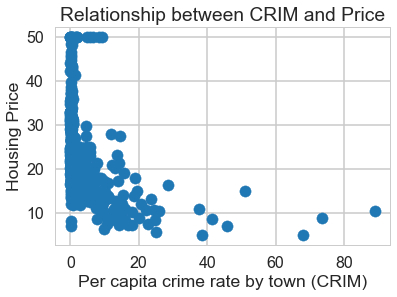

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [13]:
# your turn: describe the relationship
# ANSWER BELOW IN MARKDOWN CELL

**Observations:** the previous scatter plot implies a negative correlation between per capita crime rate by town and housing price (i.e., higher crime rate corresponds to lower prices).  However, the data does not show a clear linear relationship and there is significant clustering around very low crime rates (note the vertical column of points at or slightly above 0 on the x-axis).  There is also an interesting cluster of outliers at the high end of the housing price range (i.e., several points in a horizontal cluster at 50 on the y-axis). This outlier in the high end implies that there is some tolerance for crime in the higher-priced houses, however, the cluster does have a *relatively low* crime rate (below 20).  Nevertheless, the horizontal cluster of observations at 50 is worth further investigation since cheaper houses (i.e., in the $30-49k range) appear to be in lower crime areas.  We should explore where these expensive neighborhoods are located and why they experience a bump in crime rate. 

Text(0.5,1,'Relationship between RM and Price')

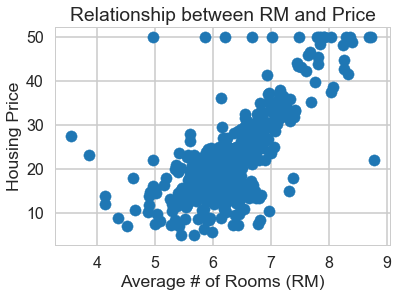

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average # of Rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

**Observations:** the previous scatter plot implies a strong *positive* correlation between the average number of rooms and the price of a home.  This follows the basic intuition that larger homes (i.e., homes with more rooms) tend to be more expensive.  There are some interesting outliers where we see relatively expensive homes that have *fewer than* four rooms (i.e., small and relatively expensive homes).  We also see some outliers in the other direction where homes with *greater than* seven rooms appear to be relatively inexpensive (i.e., large and relatively cheap homes).  Furthermore, there is something interesting happening at 50 on the y-axis where we see several data points in a horizontal line.  This tells us that, for some homes with approximately five or more rooms, the price remains the same as the size of the home increases.  Again, this observation warrants further investigation.  Perhaps the small  expensive homes are appartment units in highly desireable neighborhoods while the large cheap homes are perhaps older and located in less desireable neighborhods. 

**Note:** a further investigation of the data set shows that the max price value caps out at 50.0 (in thousands of USD).  This implies that any variation in prices above $50,000 is not captured by this data. This may help explain the horizontal clustering around 50 in each of the previous scatter plots.

Text(0.5,1,'Relationship between PTRATIO and Price')

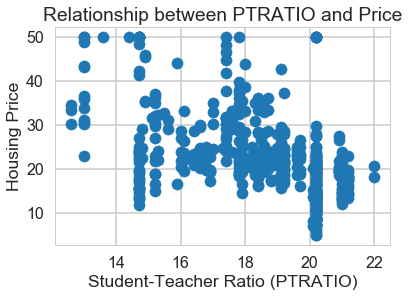

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Student-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

**Observations:** the previous scatter plot implies a very weak or nonexistent correlation between the student-teacher ratio (PTRATIO) and housing price.  There are distinct vertical clusters of observations at certain student-teacher ratios that span a range of housing prices.  This is likely due to some other factor that influences the student-teacher ratio (e.g., legislative policy) and causes many different schools in differing areas to have the same student-teacher ratio.  Furthermore, we can observe some outliers where the student-teacher ratio and the housing price are both relatively high.  This is counter-intuitive to the notion that smaller class sizes correspond to more expensive locations and school systems. The vertical clustering around specific student-teacher ratios may indicate that these are discrete rather than continuous values.

Text(0.5,1,'Relationship between ZN and Price')

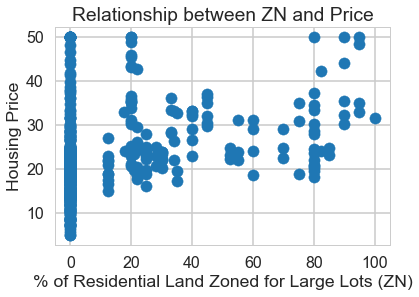

In [16]:
# your turn: create some other scatter plots
plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("% of Residential Land Zoned for Large Lots (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")

**Observations:** the previous plot shows the relationship between the percentage of residential areas zoned for "large" lots (over 25,000 sq. ft.) and the housing price.  Intuitively, one would expect that those locations with a higher percentage of large lots would correspond with higher housing prices.  The scatter plot shows that the correlation here is very weak.  We see a large vertical cluster at 0 on the x-axis, meaning that there are areas without any large lots that nevertheless span the entire range of housing prices. There are several other vertical clusters observed as well, indicating that the x-axis is not a continuous variable.  There is a lot of variability in housing price for areas with a high % of large lots and likewise for areas with a low % of large lots.  Therefore, it doesn't appear to be true that areas with larger residential lots necessarily are more expensive.  One potential explanation for this observation could be agricultural areas with a high % of larger lots that don't necessarily have larger, more expensive homes.  On the other end of the plot, the expensive housing observed in areas with very low % of large lots could be explained by smaller apartment and condo-style properties in attractive and thus expensive locations.

Text(0.5,1,'Relationship between LSTAT and Price')

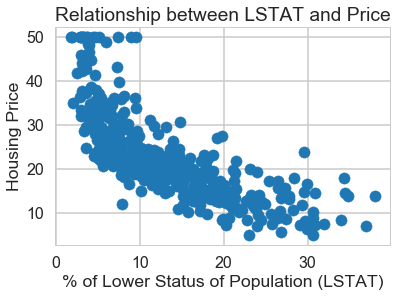

In [17]:
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% of Lower Status of Population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

**Observations:** the previous scatter plot was generated to observe the relationship between the % of the population having "lower" economic status and the housing prices.  As the plot shows, there is a strong negative correlation between the % of the lower status of the population and the housing price.  In other words, areas that have a greater % of lower status households tend to correspond with lower housing prices.  This makes sense intuitively as we would expect areas that are more impoverished to be less expensive.  

Text(0.5,1,'Relationship between NOX Concentration and Price')

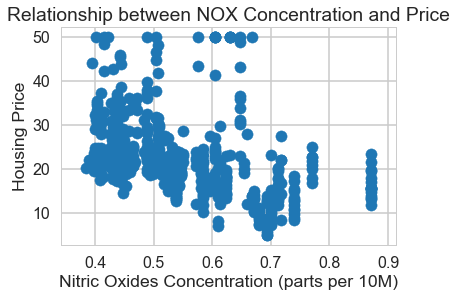

In [18]:
plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("Nitric Oxides Concentration (parts per 10M)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX Concentration and Price")

**Observations:** the previous scatter plot was generated to investigate the relationship between air polution (as measured by nitric oxides concentration) and housing price.  Intuitively, we would expect to see areas with higher air polution correspond with lower housing prices.  While the scatter plot does reveal a negative correlation supporting that intuition, there are a large number of observations at the upper end of housing price range in areas with relatively high air polution.  This could be explained by expensive housing in attractive areas locations closer to metropolitan areas and/or access to mass transit systems, which would explain the relatively high air polution figures.  Also, the existence of several vertical clusters brings into question the methods used to measure air polution across different locations.  It seems unlikely that so many locations would have the *exact same* air polution measurements.  One possible explanation could be that a single air quality measuring station was used to provide this data to a large number of locations in the area.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

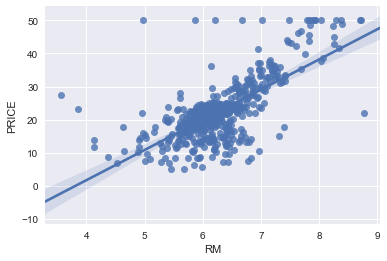

In [19]:
sns.set()
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


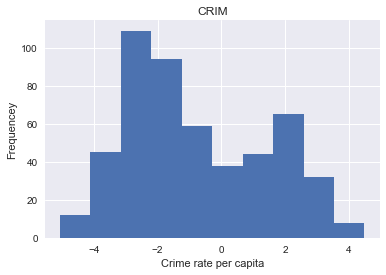

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot histograms for *RM* and *PTRATIO*, along with the two variables you picked in the previous section.</p>
</div>

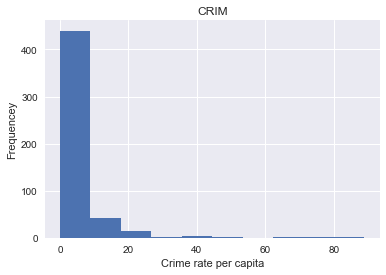

In [21]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

**Log Transformation Observations:** by transforming the x-axis scale to logarithmic, we are able to visualize differences in distribution across a broader range of values.  This allows us to judge differences between values that are otherwise tightly clustered together.  Because the range of our data is not spanning an order of magnitude, we use the *natural log*  (base $e$) to scale the x-axis appropriately. 

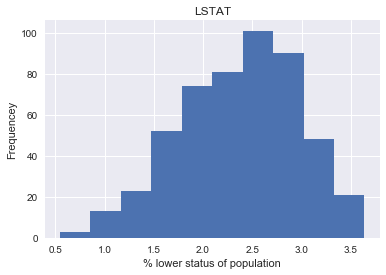

In [22]:
plt.hist(np.log(bos.LSTAT)) # natural log is used in light of right-skew
plt.title("LSTAT")
plt.xlabel("% lower status of population")
plt.ylabel("Frequencey")
plt.show()

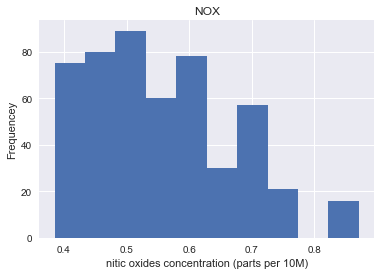

In [23]:
plt.hist(bos.NOX) 
plt.title("NOX")
plt.xlabel("nitic oxides concentration (parts per 10M)")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [24]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/jamesclare/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.49e-74
Time:                        10:22:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a pandas DataFrame with column names that you will add to your formula. In the below example you need a pandas DataFrame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0,0.5,'Predicted Values')

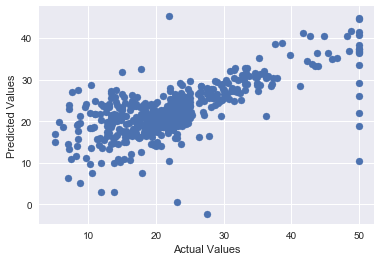

In [26]:
# your turn
plt.scatter(bos.PRICE, m.fittedvalues)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

**Observations:** this plot allows us to visualize the accuracy and residual errors of our regression model.  We can see that the model performs well for values greater than 10 and less than 50.  The regression line for this scatter plot would have a positive slope of approximately 1, indicating a stronger goodness of fit for the model.  For values below 10, the model is foggy and there is a greater amount of variance in the predicted values.  Furthermore, despite several observations of 50 in the actual values, the model did not predict any values of 50.  As mentioned above, the pricing variation for values above 50 is not captured by the original data (i.e., the data is "capped" at 50).  As a result, the model struggles to accurately predict higher values.

### Fitting Linear Regression using `sklearn`


In [27]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [28]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [29]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [30]:
# your turn

***
**Answer 1:** to change the model so that it does *not* fit an intercept term, you simply pass 'fit_intercept=False' when initializing the regression object.  In some regression cases, it makes sense to *not* fit an intercept, also known as Regression Through the Origin, or 'RTO' analysis.  This would make sense where we would expect a response variable to equal 0 if all independent variables equal 0.  In the present case, there is no basis to assume that housing price should equal 0 if our independent variables equal zero, therefore it makes sense to fit an intercept to our regression.

**Answer 2:** to satisfy the i.i.d. requirement, it is not enough that the residuals ($\epsilon$) be normally distributed. The residuals must also be *independent* - i.e., the $\epsilon$ from one prediction has no effect on the $\epsilon$ from another prediction.

**Answer 3:** False.  Linear regression requires the errors in predicting Y, i.e., the $\epsilon$ values, to be normally distributed around a mean of 0.  As long as Y is a continuous random variable, observations of Y will be normally distributed around the true mean value.  Therefore, the residuals $\epsilon$ will be normally distributed around a mean of 0.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [31]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036401


In [32]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [33]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [34]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [35]:
# your turn

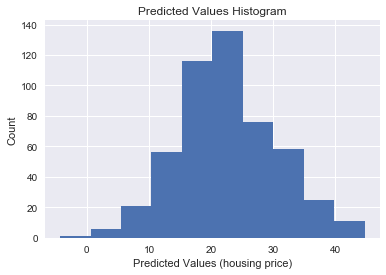

In [36]:
predicted_values = lm.predict(X)

# histogram
plt.hist(predicted_values)
plt.title('Predicted Values Histogram')
plt.xlabel('Predicted Values (housing price)')
plt.ylabel('Count')
plt.show()

**Observations:** the histogram reveals an approximately normal distribution centered around the bin range of 20-25 (in USD thousands).  There is one clear outlier of a *negative* predicted value.  We know this value is an outlier because houses cannot have *negative* prices.  This outlier is explained by relatively higher measures for those independent variables with *negative* coefficients in the regression model.  

Text(0,0.5,'Predicted Values')

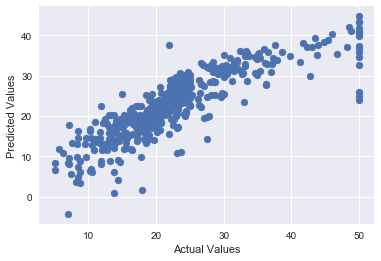

In [37]:
# scatter plot

plt.scatter(bos.PRICE, predicted_values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [38]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149872


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [39]:
# note: there was an error in the original equation here here

print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)) 

31636.0191309


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Make a scatterplot of `PTRATIO` and housing price. Tell a story about the relationship between the variables.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

Text(0.5,1,'Relationship between PTRATIO and Price')

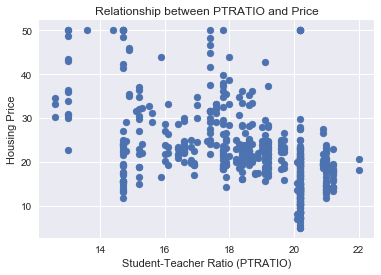

In [40]:
# your turn

# scatter plot
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Student-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

**Observations:** (copied from above) the previous scatter plot implies a very weak or nonexistent correlation between the student-teacher ratio (PTRATIO) and housing price. There are distinct vertical clusters of observations at certain student-teacher ratios that span a range of housing prices. This is likely due to some other factor that influences the student-teacher ratio (e.g., legislative policy) and causes many different schools in differing areas to have the same student-teacher ratio. Furthermore, we can observe some outliers where the student-teacher ratio and the housing price are both relatively high. This is counter-intuitive to the notion that smaller class sizes correspond to more expensive locations and school systems. The vertical clustering around specific student-teacher ratios may indicate that PTRATIO measures are discrete rather than continuous variables.

In [41]:
# fit single-variable regression model (PTRATIO)

X = np.array(bos.PTRATIO).reshape(506,1) # create nparray X with PTRATIO data points and reshapre to 2D

lm = LinearRegression()
lm.fit(X, bos.PRICE)
print('The coefficient is', lm.coef_[0])
print('The intercept is', lm.intercept_)

The coefficient is -2.15717529606
The intercept is 62.3446274748


**Coefficient:** from our single-variable regression with PTRATIO as our independent variable, we observe a coefficient of ~ -2.16. This result indicates that, as PTRATIO is increased by 1, the housing price decreases by ~$2,160 (recall that housing price is in thousands of USD). 

**Intercept:** our regression model has a fitted intercept of approx. 62.34.  This means that, if the independent variable (PTRATIO) is reduced to 0, the housing price would be over $62k.  Of course, we know that the PTRATIO can never equal 0 for a school system, so the intercept here has little descriptive significance. 

In [42]:
# extract coefficient of determination (R^2)
R_squared = lm.score(X, bos.PRICE)

print('Coefficient of determination:', R_squared)

Coefficient of determination: 0.257847318009


**$R^2$ value:** our single-variable regression model yields an $R^2$ of approximately 0.26.  Therefore, we can infer that 26% of the total variance in our response variable (i.e., housing price) is explained by our regression model.

In [43]:
# compute F-statistic from formula above
F_statistic = (R_squared/(1-R_squared))*(506-1-1)
print("F-statistic:", F_statistic)

F-statistic: 175.105542876


In [44]:
# compute p-value from F-Statistic
p_val = stats.f.sf(F_statistic, 1, 504) 
print('P-value:', p_val)

P-value: 1.60950947847e-34


**F-statistic:** our F-statistic of approximately 175 yeilds a p-value of 1.61e-34. In other words, the probability of calculating an F-score as extreme as ours is incredibly low if there truly is no relationship (i.e., $\beta=0$) between our predictor variable (PTRATIO) and our response variable (PRICE).

In [45]:
# double check using statsmodels package
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.61e-34
Time:                        10:22:25   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**Relationship between t-statistic and F-statistic:** in the present case, the F-statistic is the *square* of the t-statistic.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [46]:
# your turn

# fit linear regression using statsmodels
m_reduced = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.09e-97
Time:                        10:22:26   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

**F-statistic:** fitting our model with three independent variables (CRIM, RM and PTRATIO) results in an F-statistic of 244.2 with a probability of 1.09e-97.  Therefore, we can infer that, if the true coefficients for our independent variables (i.e., $\beta_1$, $\beta_2$ and $\beta_3$) are 0, the probability of observing coefficients as extreme as those predicted by our regression model is approximately 0.  Therefore, we can reject the null hypothesis that $\beta_1$, $\beta_2$ and $\beta_3$ = 0 and conclude that the independent variables do have effect on our response variable, housing price.

**$R^2$:** our model yields an $R^2$ value of 0.593 and an *adjusted* $R^2$ value of 0.591.  This means that approximately 59% of the variance in our response variable (i.e., housing price) is explained by our regression model.

**Predictive Significance:** the coefficients for our independent variables are as follows: CRIM = -0.2021, RM = 7.3816, PTRATIO = -1.0742.  This means that the variable that is most significant in predicting housing price, based on our model, is RM (i.e., the average number of rooms per dwelling).  For every unit increase in RM, our model predicts a unit increase of 7.3816 in housing price.  The second most significant predictor, based on our model, is the PTRATIO (i.e., student-pupil ratio).  For every unit increase in PTRATIO, our model predicts a unit *decrease* of 1.0742 in housing price.  Finally, the least predictive variable in our model is CRIM.  For every unit increast in CRIM, our model predicts a unit *decrease* of 0.2021 in housing price.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{full} - RSS_{reduced}}{K_{full} - K_{reduced}} \right)}{\left( \frac{RSS_{reduced}}{N - K_{reduced}} \right)}$$

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [47]:
# fit model with two more variables (NOX and LSTAT)
m_full = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + LSTAT',bos).fit()
print(m_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          9.68e-122
Time:                        10:22:26   Log-Likelihood:                -1550.7
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.5508      4.112      4.268      0.0

**Null Hypothesis (F-test comparison):** the additional variables added to fit our 'full' model *do not* have an effect on the response variable.  In other words, the coefficients of the additional variables equal zero.

**Alternative Hypothesis:** at least one of the additional variables included in our 'full' model has an effect on the response variable (i.e., coefficients $\neq$ 0).

**Threshold ($\alpha$):** 0.05

In [48]:
# compute F-statistic 
rss_full = np.sum((bos.PRICE - m_full.fittedvalues) ** 2)
rss_reduced = np.sum((bos.PRICE - m_reduced.fittedvalues) ** 2)

F_statistic = ((rss_reduced - rss_full)/2)/(rss_full/500)
print("F-statistic comparing models:", F_statistic)

F-statistic comparing models: 69.19798186586506


In [49]:
# calculate p-value of F-statistic

dfn = 2 # degrees of freedom in numerator
dfd = 500 # degrees of freedom in denominator

p_val = stats.f.sf(F_statistic, dfn, dfd) 
print('P-value:', p_val)

P-value: 2.95099147269e-27


**F-test Conclusion:** assuming the additional variables in our full model *do not* effect the response variable, the probability of observing an F-statistic as extreme as ours is well below our $\alpha$ of 0.05 (i.e., 5%) and therefore we can reject our null hypothesis in favor of the alternative hypothesis and conclude that at least one of the additional variables has an effect on the response variable. 

**AIC Comparison:** in further support of the results from our F-test, we observe an AIC of 3113 for our full model versus an AIC of 3233 for our reduced model.  Given that *lower* AIC values correspond to models having better fit, we can conclude that our full model is a better fit for our data.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

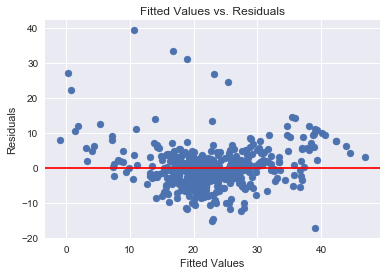

In [50]:
# Your turn.

# scatter plot: fitted vs. residuals
plt.scatter(m_reduced.fittedvalues, m_reduced.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(c='red')
plt.title('Fitted Values vs. Residuals')
plt.show()

**Observations:** the fitted values versus residuals plot above shows that the distribution of errors is approximately normal, while there are some outliers. There is no serious violation of the assumptions underlying linear regression analysis. A histogram has been added below to further visualize the approximately normal distribution of residuals, with some slight right-skew.

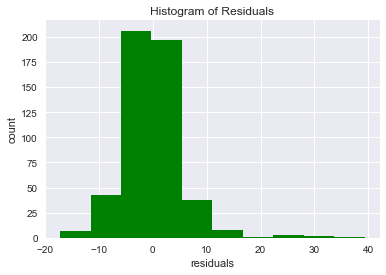

In [51]:
# histogram
plt.hist(m_reduced.resid, color='g')
plt.xlabel('residuals')
plt.ylabel('count')
plt.title('Histogram of Residuals')
plt.show()

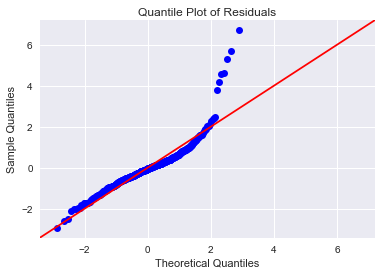

In [52]:
# compute normalized residuals
resid = m_reduced.resid
mean = np.mean(resid)
sd = np.std(resid)
z = (resid - mean) / sd

# generate qq ('quantile') plot using statsmodels api
sm.qqplot(z, line='45')
plt.title('Quantile Plot of Residuals')
plt.show()

**Obsersvations:** from the quantile plot above, we can see that the sample quantiles are approximately normally distributed and the model performs well between the -2 and 2 quantiles.  As observed in our fitted vs. residuals plot, the residuals are skewed to the right (i.e., above the mean).  The quantile plot helps us visualize the distribution relative to what a normal distribution would be.  So, we can conclude that the model breaks down and residuals are not normally distributed as we get into higher quantiles.

The both the fitted vs. residuals and qq plots offer a quick way to visualize any patterns in the distribution of the residuals.  While the fitted vs. residual plot gives a rougher sense of how normal the distribution is, the qq plot is more straightforward to interpret.  However, the qq plot does not tell us which fitted values correspond to the larger residuals.  The fitted vs. residuals plot starts to give a sense of where the uneven distribution of residuals is occuring in the model. 

Populating the interactive namespace from numpy and matplotlib


/Users/jamesclare/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


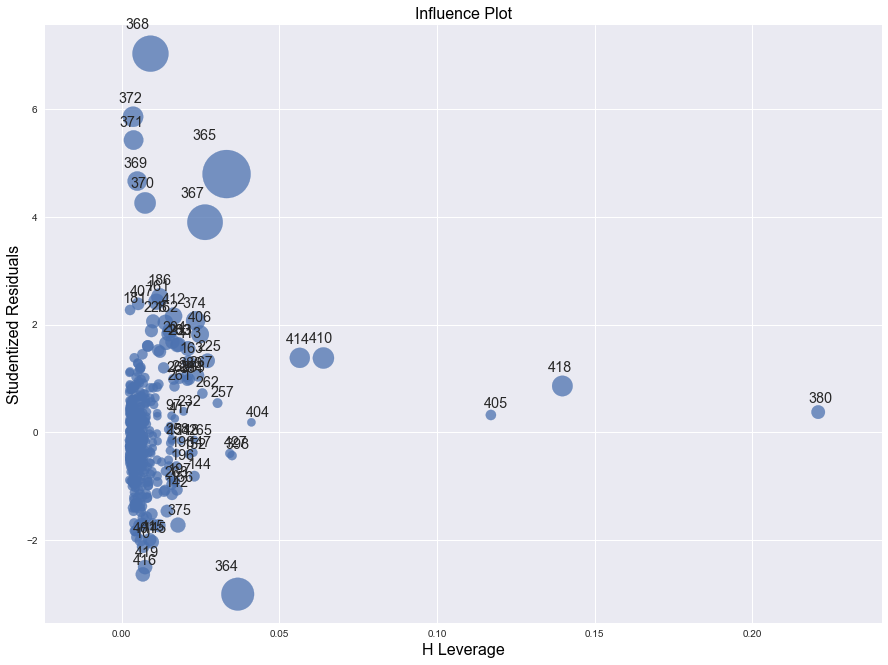

In [53]:
# make plots larger for interpretation
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 11)

# import statsmodels regression plot functions
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot

# generate influence plot
influence_plot(m_reduced)
plt.show()

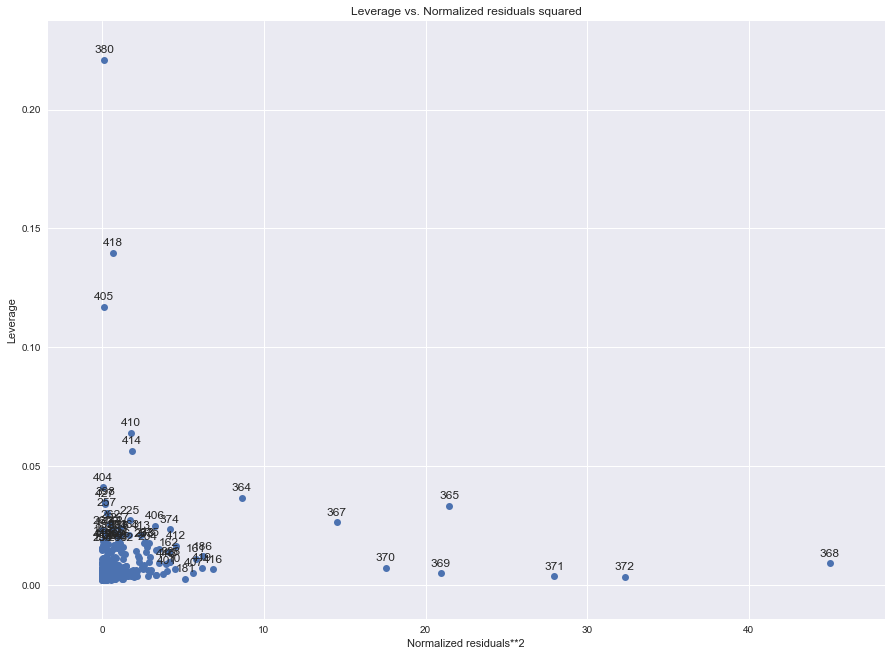

In [54]:
# construct plot of leverage vs normalized residuals squared
plot_leverage_resid2(m_reduced)
plt.show()

**Observations:** the two previous plots allow us to identify both outliers as well as high-leverage points. The second plot squares the normalized residuals and changes the axes, allowing us to see clearly which points are outliers (i.e., residuals much larger than other points) and which points are high-leverage.

From the previous plot, we are able to list the index numbers of those observations that are outliers and/or high-leverage: [380, 418, 405, 367, 370, 369, 365, 371, 372, 378].

These high leverage points are likely due to extreme predictor variables, or an unusual combination of predictor variables versus what is generally observed throughout the rest of the data.  For example, given that RM has the largest coefficient in our model, and PTRATIO has a large *negative* coefficient, it is possible that some of these leverage points would be explained by areas with large RM values *and* large PTRATIO values, which would have a significant effect on the models fit. 

In [55]:
# drop 10 largest outliers and high leverage points from dataframe

rep_bos = bos.drop([380, 418, 405, 367, 370, 369, 368, 364, 414, 410, 365, 371, 372, 378])

In [56]:
# fit new model to updated df

m_updated = ols('PRICE ~ CRIM + RM + PTRATIO', rep_bos).fit()
print(m_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     439.6
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          2.96e-138
Time:                        10:22:27   Log-Likelihood:                -1444.7
No. Observations:                 492   AIC:                             2897.
Df Residuals:                     488   BIC:                             2914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0586      3.275     -2.766      0.0

**Observations:** the updated model (having removed significant outliers and leverage points) results in an increase of over 10% in our $R^2$ and a significant decrease in our AIC value.  Therefore, we can conclude that the model has been significantly improved as a result of dropping these values.  The plots below further illustrate the differences in performance.

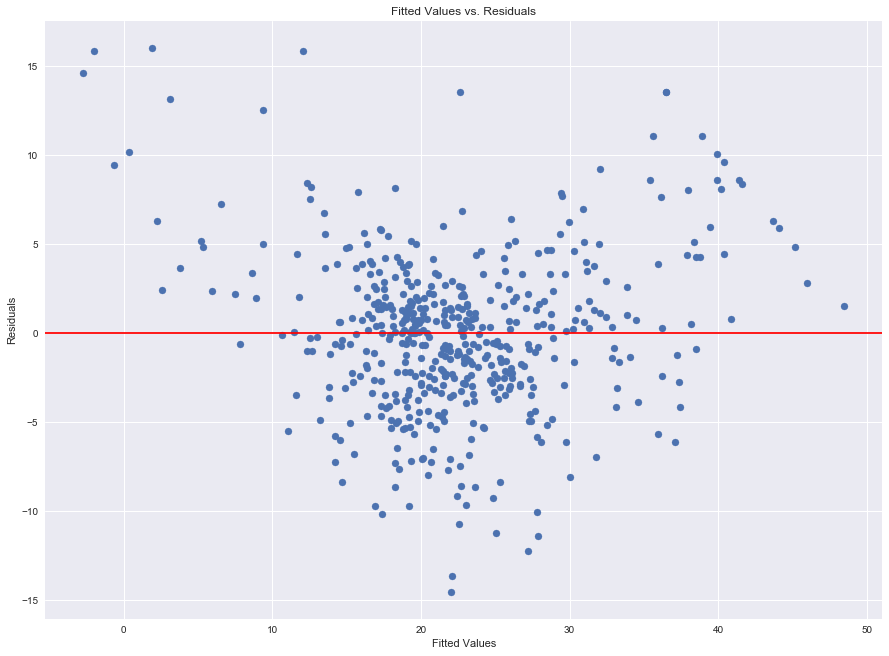

In [57]:
# scatter plot: fitted vs. residuals
plt.scatter(m_updated.fittedvalues, m_updated.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(c='red')
plt.title('Fitted Values vs. Residuals')
plt.show()

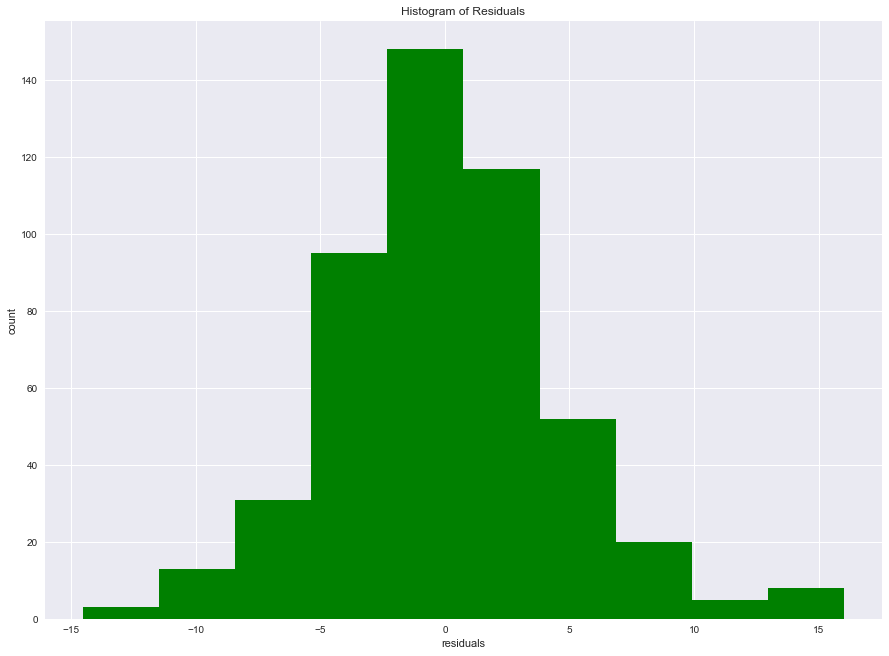

In [58]:
# histogram
plt.hist(m_updated.resid, color='g')
plt.xlabel('residuals')
plt.ylabel('count')
plt.title('Histogram of Residuals')
plt.show()

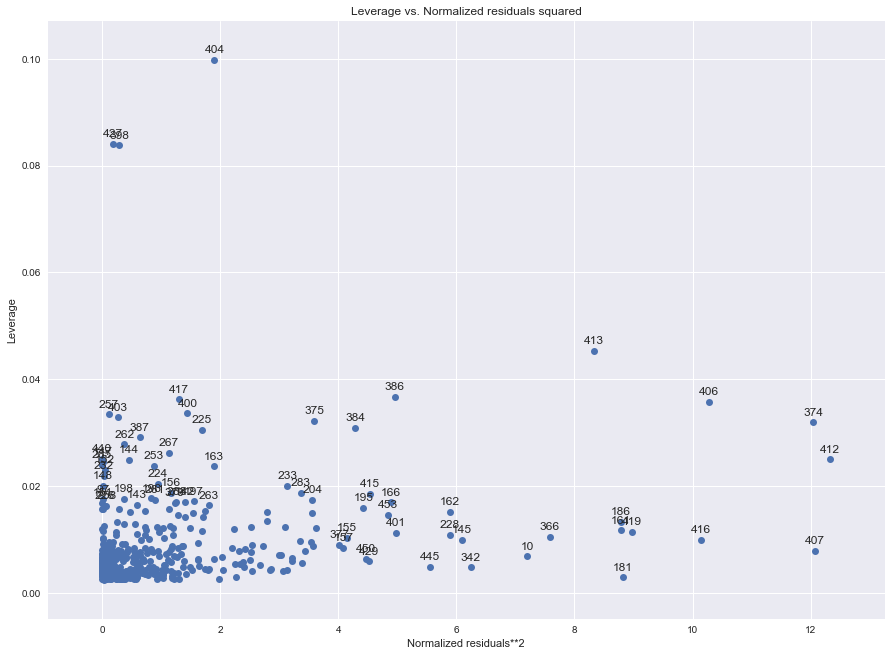

In [59]:
# leverage vs normalized residuals squared
plot_leverage_resid2(m_updated)
plt.show()